In [1]:
"""
# Header ------------------------------------------------------------------
"""
import pyjags
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from core import *
from model import build
from scipy.stats import poisson
np.set_printoptions(precision=10)

## Serius

In [2]:
# data ----------------------------------------------------------

np.random.seed(123)

df = pd.read_csv("experiment1.csv")

In [3]:
models=build()

In [4]:
T = np.unique(df["Year"]).shape[0]

d15n=df.loc[ df["Year"]== 2015, ["Population"] ].values
d16n=df.loc[ df["Year"]== 2016, ["Population"] ].values

d15y=df.loc[ df["Year"]== 2015, ["Property crime"] ].values
d16y=df.loc[ df["Year"]== 2016, ["Property crime"] ].values

n=np.array([d15n, d16n]).squeeze(-1).T
y=np.array([d15y, d16y]).squeeze(-1).T

df["Regions"] = pd.Categorical(df["Regions"])
df["Year"] = pd.Categorical(df["Year"])

region = df["Regions"].cat.codes.values.reshape(-1)
year = df["Year"].cat.codes.values.reshape(-1)

nregions = np.unique(region).shape[0]
nstates = n.shape[0]

In [13]:
def eplot(model, y, n, it = 10000, chains=4,sslice =1000, debug = False):
    samples = sample(model[0], model[2], varnames=model[1], chains=chains, trials=it)
    
        
    y_pred = np.mean( samples['y_pred'][:,:,-sslice:,:], axis=(-1,-2) )
    theta_mean = np.mean( samples['theta'][:,:,-sslice:,:], axis=(-1,-2) )
    theta_median = np.median( samples['theta'][:,:,-sslice:,:], axis=(-1,-2) )
    
    
    loglikl_mean = np.sum(poisson.logpmf(y.ravel(),n.ravel() * theta_mean.ravel()))
    loglikl_median = np.sum(poisson.logpmf(y.ravel(),n.ravel() * theta_median.ravel()))
    
    
    y_predmean = n.ravel() * theta_mean.ravel()
    mse_mean = np.sum(((y.ravel()-y_predmean)/y.ravel())**2) 
    
    y_predmd = n.ravel() * theta_median.ravel()
    mse_md = np.sum(((y.ravel()-y_predmd)/y.ravel())**2) 
    
    aic_mean = 2* model[3] - 2 * loglikl_mean
    aic_md = 2* model[3] - 2 * loglikl_median
    sic_mean = 2* np.log(len(y.ravel()))*model[3] - 2 * loglikl_mean
    sic_md = 2* np.log(len(y.ravel()))*model[3] - 2 * loglikl_median
    
    print("######################")
    
    print("### mean: ---")
    print("Log likelihood: " + str(loglikl_mean)) 
    print("aic: "+ str(aic_mean))
    print("sic: "+ str(sic_mean))
    print("chi-square : " + str(mse_mean))
    
    print("### median: ---")
    print("Log likelihood: " + str(loglikl_median))
    print("aic: "+ str(aic_md))
    print("sic: "+ str(sic_md))
    print("chi-square : " + str(mse_md))
    
    print("### sampled: ---")
    print("mse: " + str(np.sum(((y.ravel()-y_pred.ravel())/y.ravel())**2) ) )
    
    print("######################")
    if debug:
        analyse_fit(model[1],samples)
    
    plot_predictive(
        n.ravel(),
        y.ravel(), 
        y_pred.ravel())
    #plt.scater()
    plt.show()

# notation

## nation, region, state, time
### time - i - ar1 lin, q - ar1 quad, s - stationary 
### region, state, natio - i - independent, f - fixed effect, c - car effect, s - sar effect

adapting: iterations 2684 of 4000, elapsed 0:00:10, remaining 0:00:05
adapting: iterations 4000 of 4000, elapsed 0:00:15, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:15, remaining 0:00:00
sampling: iterations 2516 of 40000, elapsed 0:00:09, remaining 0:02:16
sampling: iterations 5260 of 40000, elapsed 0:00:19, remaining 0:02:06
sampling: iterations 8016 of 40000, elapsed 0:00:29, remaining 0:01:55
sampling: iterations 10784 of 40000, elapsed 0:00:39, remaining 0:01:45
sampling: iterations 12172 of 40000, elapsed 0:00:44, remaining 0:01:40
sampling: iterations 13556 of 40000, elapsed 0:00:49, remaining 0:01:36
sampling: iterations 16316 of 40000, elapsed 0:00:59, remaining 0:01:26
sampling: iterations 19080 of 40000, elapsed 0:01:09, remaining 0:01:16
sampling: iterations 20464 of 40000, elapsed 0:01:14, remaining 0:01:11
sampling: iterations 21844 of 40000, elapsed 0:01:19, remaining 0:01:06
sampling: iterations 24600 of 40000, elapsed 0:01:29, remaining 0:00:56
s

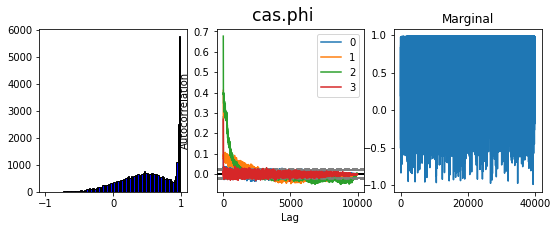

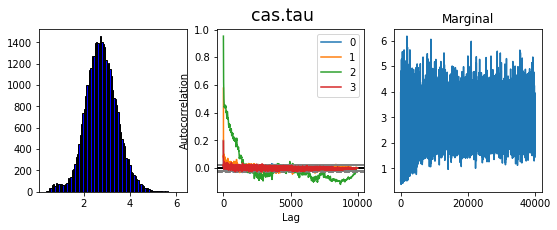

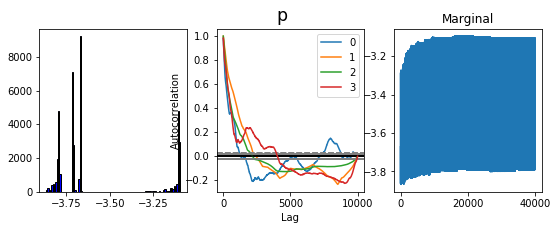

chi-square : 0.14229479760394448


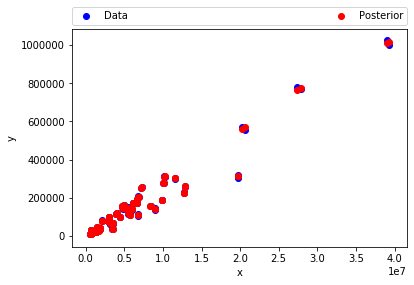

In [17]:
eplot(models["fics"], y = y, n=n, it=10000, sslice=4000, debug=True)

adapting: iterations 4000 of 4000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 31700 of 40000, elapsed 0:00:09, remaining 0:00:02
sampling: iterations 40000 of 40000, elapsed 0:00:12, remaining 0:00:00
######################
### mean: ---
Log likelihood: -3014.61851860935
aic: 6163.2370372187
sic: 6651.5854177036435
chi-square : 0.06808127660560404
### median: ---
Log likelihood: -3014.6191315015203
aic: 6163.238263003041
sic: 6651.5866434879845
chi-square : 0.06807817948149827
### sampled: ---
mse: 0.06808589288159222
######################
chi-square : 0.06808589288159222


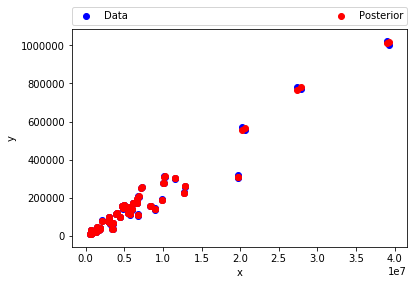

In [18]:
eplot(models["fcfs"], y = y, n=n, it=10000, sslice=4000)